#             第二次分组作业

In [2]:
#分组作业二： 收益、风险与投资组合
#基于第一次分组作业所选择的行业， 分析该行业下部分股票的月简单收益率。 将所有时间（sina日数据）分为不交的长度为三年（或四年）的时间段， [1991-1-1, 1993-12-31], [1994-1-1, 1996-12-31]...
#计算每只股票的月收益率，选择若干只(>=小组人数)分析其分布。
#计算每段时间内行业内每只股票的月期望收益率和标准差,画两个图形，分别给出收益率和标准差的走势图形并作简单说明。要求：横轴为时间，纵轴为预期收益率或标准差，每只股票用一种颜色的线条表示，并将所有股票对应的线条画在一个坐标系内。
#以标准差为横轴，期望收益率和纵轴，用上面计算的所有数据作散点图，不同股票用不同颜色，同一支股票的不同时间得到的数据用相同的颜色。
#从上面股票中，对每个时间窗，计算股票收益率之间的相关系数矩阵，只取下三角形中不是1的数据。统计每个时间段相关系数的最大值，最小值，均值，25%和75%分为点（表格汇总）。用box图画出相关系数的分布，横坐为时间轴，每个时间段对应一个分布图
#进一步分析上面得到的结果，讨论如下问题：
#(a). 总体上看，高收益，高风险的模式是否成立？
#(b). 时间周轴上看，每只股票的收益风险特性是否稳定？
#(c). 相关系数的分布是否稳定？
#选择3只数据比较完整的股票，对每个时间段作投资组合分析，包括：
#(d). 在没有无风险资产的情况下计算并画出有效前沿
#(e). 在有无风险资产的情形下计算并画出有效前沿，其中需要计算切线组合
#(f). 比较不同时间段计算的投资组合的差异，有效前沿，切线组合等
import pandas.io.sql as sql
from lxml.html import parse
from urllib2 import urlopen
from os.path import getsize
import pandas as pd
import urllib 
import numpy as np
import os
import sys
from matplotlib.pyplot import plot,savefig 
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import statsmodels.api as sm
import scipy.stats as stats 

*得到股票的月收益率
数据时间原因不能用已存的数据库

*分析月收益率分布
直方图、box图、QQ图

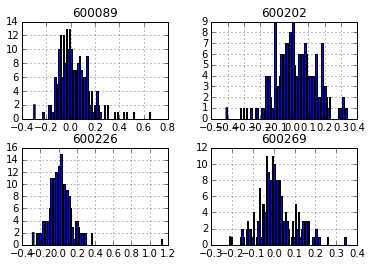

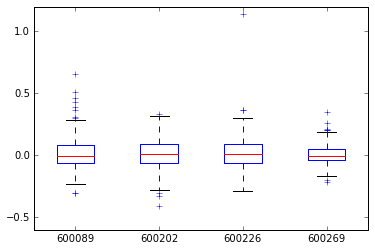

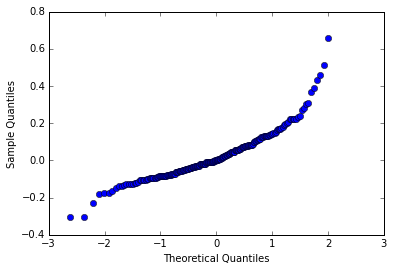

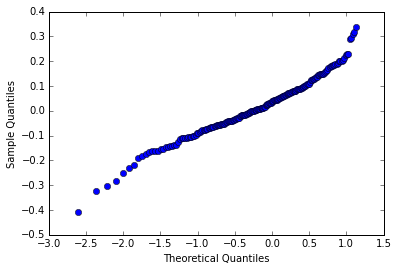

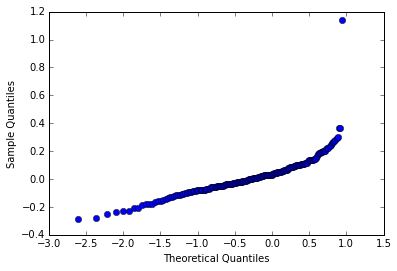

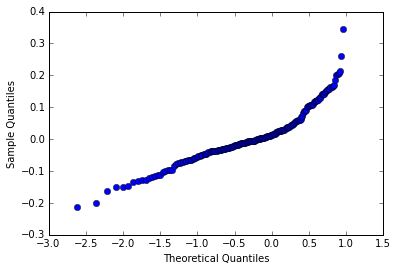

In [7]:
#1
%matplotlib inline 
list_stock=['600089','600202','600226','600269']
list_time=['1991','1993','1994','1996','1997','1999','2000','2002','2003','2005','2006','2008','2009','2011','2012','2014']
total_data=data.resample('M',how='last').pct_change()
total_data.hist(bins=80)
total_data.plot(kind='box')
for i in range(len(list_stock)):
    sm.qqplot(total_data[list_stock[i]],stats.norm,line='s')

*收益率的折线图
标准差折线图
收益率和标准差的散点图

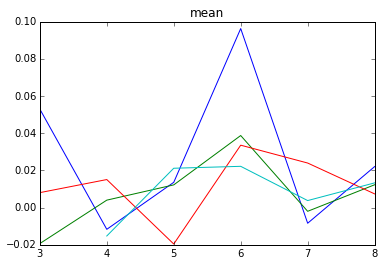

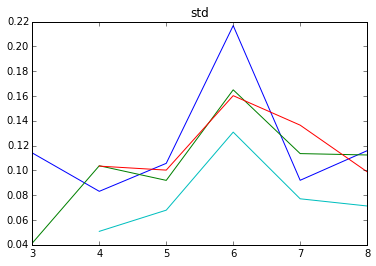

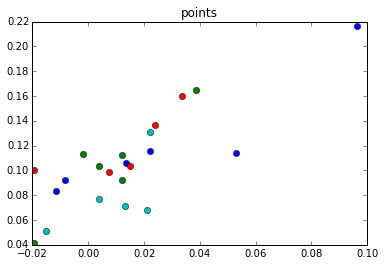

In [8]:
#2/3

plt.figure(1)
plt.figure(2)
plt.figure(3)
for j in range(len(list_stock)):
    month_rate=data[list_stock[j]].resample('M',how='last').pct_change()
    Emu=[]
    Esigma=[]
    for i in range(0,len(list_time),2):
        Emu.append(month_rate[list_time[i]:list_time[i+1]].mean())
        Esigma.append(month_rate[list_time[i]:list_time[i+1]].std())
    plt.figure(1)
    plt.plot([1,2,3,4,5,6,7,8],Emu)
    plt.title('mean')
    plt.figure(2)
    plt.plot([1,2,3,4,5,6,7,8],Esigma)
    plt.title('std')
    plt.figure(3)
    plt.plot(Emu,Esigma,'o')
    plt.title('points')

*符合高收益高风险
时间轴上看，单支股票的收益与风险并不稳定

*股票收益率之间的相关系数矩阵
如何提取出下三角矩阵

1991 to 1993
        600089  600202  600226  600269
600089     NaN     NaN     NaN     NaN
600202     NaN     NaN     NaN     NaN
600226     NaN     NaN     NaN     NaN
600269     NaN     NaN     NaN     NaN
1994 to 1996
        600089  600202  600226  600269
600089     NaN     NaN     NaN     NaN
600202     NaN     NaN     NaN     NaN
600226     NaN     NaN     NaN     NaN
600269     NaN     NaN     NaN     NaN
1997 to 1999
          600089    600202  600226  600269
600089  1.000000  0.123185     NaN     NaN
600202  0.123185  1.000000     NaN     NaN
600226       NaN       NaN     NaN     NaN
600269       NaN       NaN     NaN     NaN
2000 to 2002
          600089    600202    600226    600269
600089  1.000000  0.513944  0.288355  0.746060
600202  0.513944  1.000000  0.377474  0.561098
600226  0.288355  0.377474  1.000000  0.284280
600269  0.746060  0.561098  0.284280  1.000000
2003 to 2005
          600089    600202    600226    600269
600089  1.000000  0.432415  0.340635 -0.002911
6

(0, 1)

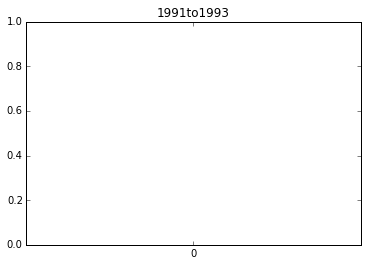

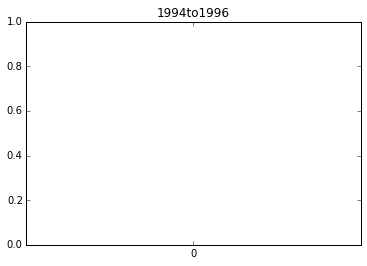

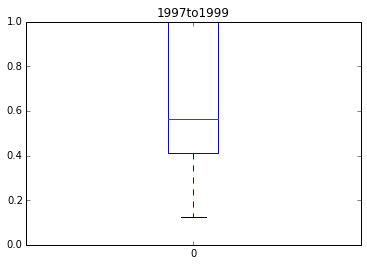

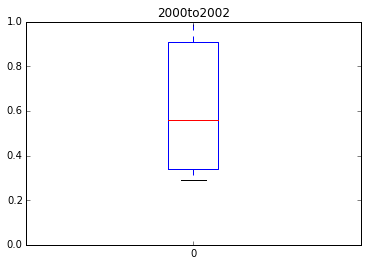

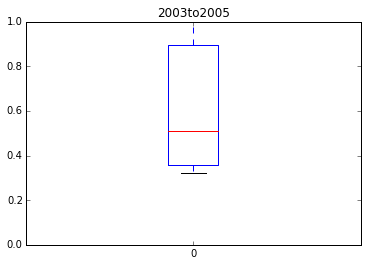

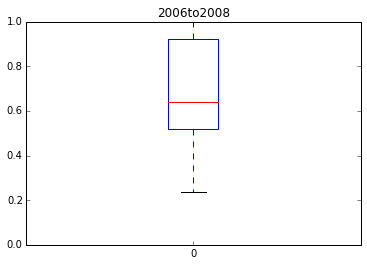

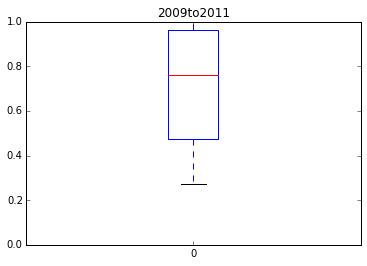

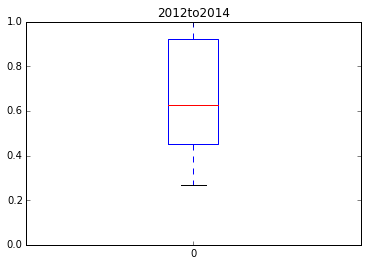

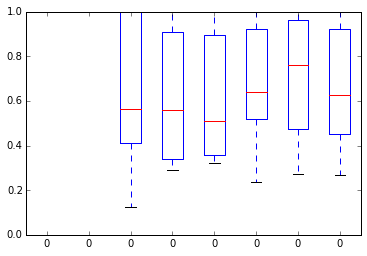

In [9]:
#4
for i in range(0,len(list_time),2):
    month_rate=data[list_time[i]:list_time[i+1]].resample('M',how='last').pct_change()
    sigma=month_rate.corr()
    print(list_time[i]+' to '+list_time[i+1])
    print(sigma)
    x=[]
    for j in range(len(list_stock)):
        for k in range(0,len(list_stock)-1-j):
            x.append(sigma[list_stock[j]][list_stock[k]])
    if i==0:
        y=DataFrame(x).describe()
        plt.figure(i)
        y.plot(kind='box')
        plt.ylim([0,1])
        
    else:
        z=DataFrame(x).describe()
        y=pd.concat([y,z],axis=1)
        plt.figure(i)
        z.plot(kind='box')
        plt.ylim([0,1])
    plt.title(list_time[i]+'to'+list_time[i+1])
plt.figure(len(list_stock)+1)
y.plot(kind='box')
plt.ylim([0,1])
#m=y.T.reset_index().T
#m=m.drop('index')
#m.plot(kind='box',figsize=(12,8))
#month_rate=data.resample('M',how='last').pct_change()
#sigma=month_rate.corr()
#x=[sigma['2']['1'],sigma['3']['1'],sigma['3']['2'],sigma['4']['1'],sigma['4']['2'],sigma['4']['3']]
#DataFrame(x).describe()

*相关系数在0.6附近

*选择三支完整股票做投资组合分析
由于数据缺失会报错，加入try只分析数据完整的时间段

In [4]:
def get_sina_stock(stockid,start="1990-12-19",end=pd.datetime.now(),isstock=True,fuquan=True):    
    def _unpack(row, kind='td'):
        elts = row.findall('.//%s' % kind)
        return [val.text_content().strip() for val in elts] # .strip()鍘绘帀\r\t\n涔嬬被鐨勫瓧绗�    
    def parse_options_data(table,isstock,fuquan):
        rows = table.findall('.//tr')
        data = [_unpack(r) for r in rows[2:]]
        if isstock & fuquan:
            colnames = ['date','open','high','close','low','vol','amount','ratio'] # 鍥為伩涓枃澶勭悊
        else:
            colnames = ['date','open','high','close','low','vol','amount']
        data= pd.DataFrame(data,columns=colnames)
        data.index=pd.to_datetime(data["date"])
        data=data.drop("date",axis=1)
        data=data.ix[range(len(data)-1,-1,-1)]
        return  data
    data=pd.DataFrame()
    daterange=pd.date_range(start,end,freq="Q")
    daterange=daterange.insert(len(daterange),daterange[-1]+1)
    for cq in daterange: 
        if isstock:
            if fuquan:
                url='http://vip.stock.finance.sina.com.cn/corp/go.php/vMS_FuQuanMarketHistory/stockid/'+str(stockid)+'.phtml?year='+str(cq.year)+'&jidu='+str(cq.month/3)
            else:
                url='http://vip.stock.finance.sina.com.cn/corp/go.php/vMS_MarketHistory/stockid/'+str(stockid)+'.phtml?year='+str(cq.year)+'&jidu='+str(cq.month/3)            
        else:            
            url='http://vip.stock.finance.sina.com.cn/corp/go.php/vMS_MarketHistory/stockid/'+str(stockid)+'/type/S.phtml?year='+str(cq.year)+'&jidu='+str(cq.month/3)
        try:
            parsed = parse(urlopen(url))
        except:
            print "download failed for year=" +str(cq.year)+',  jidu='+str(cq.month/3)
            continue
        doc = parsed.getroot()
        tables=doc.findall('.//table')     
        da= tables[-1] # last table 19 for fuquan data and 4 for index
        datatem = parse_options_data(da,isstock,fuquan)
        data=pd.concat([data,datatem])
    return pd.DataFrame(data[start:end],dtype=float)    
data1=get_sina_stock('600089','1991-1-1','2015-11-20').close
data2=get_sina_stock('600202','1991-1-1','2015-11-20').close
data3=get_sina_stock('600226','1991-1-1','2015-11-20').close
data4=get_sina_stock('600269','1991-1-1','2015-11-20').close
data1.name='600089'#特变电工
data2.name='600202'#哈空调
data3.name='600226'#升华拜克
data4.name='600269'#赣粤高速
data=pd.concat([data1,data2,data3,data4],axis=1)

C:\Users\xiayingfan\Anaconda\lib\site-packages\numpy\lib\function_base.py:1890: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
C:\Users\xiayingfan\Anaconda\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


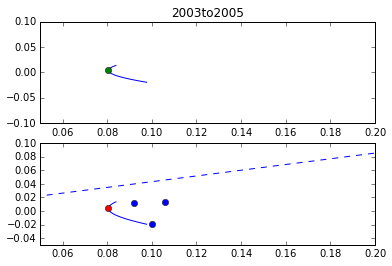

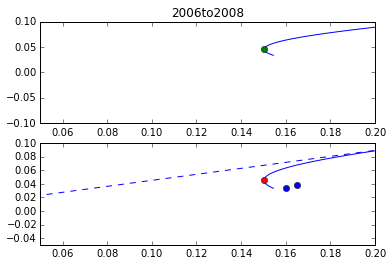

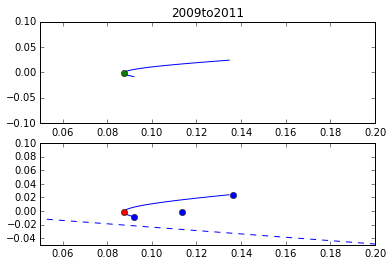

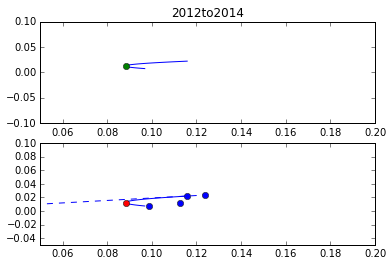

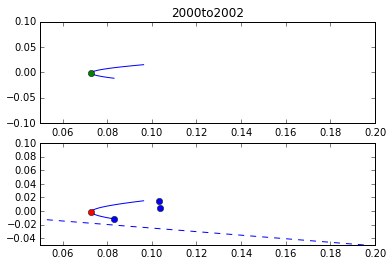

In [10]:
id_stock=['600089','600202','600269']
freq='M'
data0=pd.concat([data1,data2,data3],axis=1).resample('M',how='last').pct_change()
for i in range(0,len(list_time),2):
    try:
        Mu=data0[list_time[i]:list_time[i+1]].mean().reshape((3,1))
        Sigma=data0[list_time[i]:list_time[i+1]].cov()
        Sigma=np.matrix(Sigma)
        N=len(Mu)
        Mu=np.matrix(Mu.reshape(N,1))
        onesv=np.matrix(np.ones((N,1)))
        SI=Sigma.I
        A=Mu.T*SI*onesv; A=A[0,0]
        B=Mu.T*SI*Mu; B=B[0,0]
        C=onesv.T*SI*onesv; C=C[0,0]
        D=B*C-A**2
        g=SI*onesv*B/D-SI*Mu*A/D
        h=SI*Mu*C/D-SI*onesv*A/D
        mmin=np.min(Mu)
        mmax=np.max(Mu)
        meanv=np.linspace(mmin,mmax,100)
        wv=map(lambda x: g+x*h,meanv)
        sigmav=map(lambda x: np.sqrt(x.T*Sigma*x)[0,0],wv)
        mumin=-g.T*Sigma*h/(h.T*Sigma*h)
        sigmamin=np.sqrt(g.T*Sigma*g-(g.T*Sigma*h)**2/(h.T*Sigma*h))
        muf=0.001
        wt=SI*(Mu-muf)
        wt=wt/(onesv.T*wt)
        mut=wt.T*Mu
        sigmat=np.sqrt(wt.T*Sigma*wt)
        Sig=data0[list_time[i]:list_time[i+1]].std()
        plt.figure(i)
        ax1=plt.subplot(211)
        ax2=plt.subplot(212)
        plt.sca(ax1)
        plot(sigmav,meanv)
        plot(sigmamin,mumin,'o')
        plt.xlim([0.05,0.2]) 
        plt.ylim([-0.1,0.1])
        plt.title(list_time[i]+'to'+list_time[i+1])
        plt.sca(ax2)
        plt.plot(sigmav,meanv)
        plt.plot(Sig,Mu,"bo")
        plt.plot(sigmamin,mumin,"ro")
        plt.plot([0,sigmat.item(0)],[muf,mut.item(0)],"bo--")
        plt.xlim([0.05,0.2]) 
        plt.ylim([-0.05,0.10])
    except:
        continue


*在有无风险资产的情况下切线组合可能出现异常，所以应该加入判断